In [1]:
import os
import json

# Set the folder path containing the JSON files
input_folder = './D420'  # Replace with your actual folder path
output_file = './D420_merged_dialogues.json'  # Output path for the merged file

# Initialize a list to store all dialogue entries
merged_dialogues = []

# Iterate through all JSON files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(input_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            # If the file contains a list of dialogues, extend the merged list
            if isinstance(data, list):
                merged_dialogues.extend(data)
            else:
                merged_dialogues.append(data)

# Save the merged result to a new file
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(merged_dialogues, f, ensure_ascii=False, indent=2)

print(f'Merged a total of {len(merged_dialogues)} dialogues. Output saved to: {output_file}')


Merged a total of 500 dialogues. Output saved to: ./D420_merged_dialogues.json


In [25]:
import os
import json

# Set the folder path containing the JSON files
input_folder = './D445'  # Replace with your actual folder path
output_file = './D445_merged_dialogues.json'  # Output path for the merged file

# Initialize a list to store all dialogue entries
merged_dialogues = []

# Iterate through all JSON files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(input_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            # If the file contains a list of dialogues, extend the merged list
            if isinstance(data, list):
                merged_dialogues.extend(data)
            else:
                merged_dialogues.append(data)

# Save the merged result to a new file
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(merged_dialogues, f, ensure_ascii=False, indent=2)

print(f'Merged a total of {len(merged_dialogues)} dialogues. Output saved to: {output_file}')


Merged a total of 600 dialogues. Output saved to: ./D445_merged_dialogues.json


In [11]:
import os
import json

# Set the folder path containing the JSON files
input_folder = './D465'  # Replace with your actual folder path
output_file = './D465_merged_dialogues.json'  # Output path for the merged file

# Initialize a list to store all dialogue entries
merged_dialogues = []

# Iterate through all JSON files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(input_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            # If the file contains a list of dialogues, extend the merged list
            if isinstance(data, list):
                merged_dialogues.extend(data)
            else:
                merged_dialogues.append(data)

# Save the merged result to a new file
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(merged_dialogues, f, ensure_ascii=False, indent=2)

print(f'Merged a total of {len(merged_dialogues)} dialogues. Output saved to: {output_file}')


Merged a total of 600 dialogues. Output saved to: ./D465_merged_dialogues.json


In [4]:
import os
import json

# Set the folder path containing the JSON files
input_folder = './D470'  # Replace with your actual folder path
output_file = './D470_merged_dialogues.json'  # Output path for the merged file

# Initialize a list to store all dialogue entries
merged_dialogues = []

# Iterate through all JSON files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(input_folder, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            # If the file contains a list of dialogues, extend the merged list
            if isinstance(data, list):
                merged_dialogues.extend(data)
            else:
                merged_dialogues.append(data)

# Save the merged result to a new file
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(merged_dialogues, f, ensure_ascii=False, indent=2)

print(f'Merged a total of {len(merged_dialogues)} dialogues. Output saved to: {output_file}')


Merged a total of 500 dialogues. Output saved to: ./D470_merged_dialogues.json


In [35]:
import json
import re
from tqdm import tqdm

# Filtering parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1
REQUIRED_KEYWORDS = [
    "transfer", "moving", "move", "slide", "get up", "surface", "shift", "scoot", "pivot",
    "bed", "chair", "bench", "seat", "sofa", "couch"
]

# File paths
input_file = 'D420_merged_dialogues.json'
json_output_file = 'D420_filtered_dialogues.json'
chatml_output_file = 'D420_filtered_chatml.txt'

# Clean markdown-style formatting from text
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip().lower())

# Filtering function
def is_valid_dialogue(dialogue_item):
    dialogue = dialogue_item["dialogue"]

    if len(dialogue) < MIN_TURNS:
        return False

    for turn in dialogue:
        if len(turn["content"].strip()) < MIN_CONTENT_LENGTH:
            return False

    last_content = None
    for turn in dialogue:
        current = clean_markdown(turn["content"])
        if last_content == current:
            return False
        last_content = current

    full_text = " ".join(clean_markdown(turn["content"]) for turn in dialogue)
    if not any(keyword in full_text for keyword in REQUIRED_KEYWORDS):
        return False

    # 🚫 6. Filter if mentions any ICF-related term
    icf_mentions = ["icf category", "d420", "d445", "d465", "d470"]
    if any(term in full_text for term in icf_mentions):
        return False

    last_speaker = None
    for turn in dialogue:
        speaker = turn.get("speaker", "").lower()
        if speaker not in {"doctor", "patient"}:
            return False
        if speaker == last_speaker:
            return False
        last_speaker = speaker

    return True


# Convert dialogue to ChatML format
def convert_to_chatml(dialogue):
    lines = []
    lines.append("<|im_start|>system\nYou are a professional and empathetic doctor engaging in a clinical consultation.\n<|im_end|>")
    for turn in dialogue:
        role = "user" if turn["role"] == "user" else "assistant"
        content = turn["content"].strip()
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")
    return "\n".join(lines)

# ✅ LOAD the dialogues
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# Run filtering and conversion
filtered_dialogues = []
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Filtering and converting"):
    if is_valid_dialogue(item):
        filtered_dialogues.append(item)
        chatml_converted_dialogues.append(convert_to_chatml(item["dialogue"]))

# Save filtered JSON
with open(json_output_file, 'w', encoding='utf-8') as f:
    json.dump(filtered_dialogues, f, ensure_ascii=False, indent=2)

# Save ChatML for fine-tuning
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Original: {len(dialogues)} | Kept: {len(filtered_dialogues)}")
print(f"✅ Saved filtered JSON to: {json_output_file}")
print(f"✅ Saved ChatML text for fine-tuning to: {chatml_output_file}")


Filtering and converting: 100%|████████████| 500/500 [00:00<00:00, 15284.03it/s]

✅ Done! Original: 500 | Kept: 398
✅ Saved filtered JSON to: D420_filtered_dialogues.json
✅ Saved ChatML text for fine-tuning to: D420_filtered_chatml.txt


In [49]:
import json
import re
from tqdm import tqdm

# Parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1

# 输入输出文件路径
input_file = 'D420_filtered_dialogues.json'
chatml_output_file = 'D420_chatml_with_icf.txt'

# ICF 信息
icf_code = "D420"
icf_name = "Transferring Oneself"
icf_definition = "moving from one surface to another, such as sliding along a bench or moving from a bed to a chair, without changing body position"

# 清洗文本
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip())

# 转换为 ChatML 格式
def convert_to_chatml(dialogue_item):
    dialogue = dialogue_item["dialogue"]
    lines = []
    profile = dialogue_item.get("patient_profile", {})
    age = profile.get("age", "unknown age")
    gender = profile.get("gender", "unknown gender")
    disease = profile.get("disease", "unspecified condition")
    clinician_role = profile.get("clinician_role", "healthcare provider")
    severity = dialogue_item.get("severity_level", "unknown")

    system_prompt = (
        f"You are a professional and empathetic {clinician_role} conducting a clinical consultation with a "
        f"{age}-year-old {gender} patient diagnosed with {disease}. The focus of this session is on assessing "
        f"his or her ability related to the ICF category {icf_code} – {icf_name}, which refers to {icf_definition}. "
        f"The patient reports a severity level of {severity} (1–complete dysfunction to 5–no problem). "
        f"Your goal is to explore the functional challenges and emotional experiences associated with this activity."
)
    lines.append(f"<|im_start|>system\n{system_prompt}\n<|im_end|>")

    # 多轮对话
    for turn in dialogue:
        role = "user" if turn["speaker"] == "patient" else "assistant"
        content = clean_markdown(turn["content"])
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")

    return "\n".join(lines)

# 加载过滤后的 D420 数据
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# 转换并保存
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Converting to ChatML"):
    chatml_converted_dialogues.append(convert_to_chatml(item))

# 写入 ChatML 文件
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Converted: {len(chatml_converted_dialogues)} dialogues.")
print(f"✅ Saved ChatML to: {chatml_output_file}")


Converting to ChatML: 100%|████████████████| 398/398 [00:00<00:00, 24299.59it/s]

✅ Done! Converted: 398 dialogues.
✅ Saved ChatML to: D420_chatml_with_icf.txt


In [36]:
import json
import re
from tqdm import tqdm

# Filtering parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1
REQUIRED_KEYWORDS = [
    "push", "pull", "reaching", "reach", "turn", "twist", "throw", "catch",
    "lift", "carry", "move arm", "move hand", "grasp", "arm", "hand", "shoulder"
]

# File paths
input_file = 'D445_merged_dialogues.json'
json_output_file = 'D445_filtered_multi_dialogues.json'
chatml_output_file = 'newD445_filtered_chatml.txt'

# Clean markdown-style formatting from text
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip().lower())

# Filtering function
def is_valid_dialogue(dialogue_item):
    dialogue = dialogue_item["dialogue"]

    # 1. Minimum turn count
    if len(dialogue) < MIN_TURNS:
        return False

    # 2. Minimum content length per turn
    for turn in dialogue:
        if len(turn["content"].strip()) < MIN_CONTENT_LENGTH:
            return False

    # 3. Repetition check (with markdown cleaned)
    last_content = None
    for turn in dialogue:
        current = clean_markdown(turn["content"])
        if last_content == current:
            return False
        last_content = current

    # 4. Keyword coverage check (cleaned)
    full_text = " ".join(clean_markdown(turn["content"]) for turn in dialogue)
    if not any(keyword in full_text for keyword in REQUIRED_KEYWORDS):
        return False

    # 5. Alternating speakers check
    last_speaker = None
    for turn in dialogue:
        speaker = turn.get("speaker", "").lower()
        if speaker not in {"doctor", "patient"}:
            return False
        if speaker == last_speaker:
            return False
        last_speaker = speaker

    return True

# Convert dialogue to ChatML format
def convert_to_chatml(dialogue):
    lines = []
    lines.append("<|im_start|>system\nYou are a professional and empathetic doctor engaging in a clinical consultation.\n<|im_end|>")
    for turn in dialogue:
        role = "user" if turn["role"] == "user" else "assistant"
        content = turn["content"].strip()
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")
    return "\n".join(lines)

# ✅ LOAD the dialogues
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# Run filtering and conversion
filtered_dialogues = []
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Filtering and converting"):
    if is_valid_dialogue(item):
        filtered_dialogues.append(item)
        chatml_converted_dialogues.append(convert_to_chatml(item["dialogue"]))

# Save filtered JSON
with open(json_output_file, 'w', encoding='utf-8') as f:
    json.dump(filtered_dialogues, f, ensure_ascii=False, indent=2)

# Save ChatML for fine-tuning
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Original: {len(dialogues)} | Kept: {len(filtered_dialogues)}")
print(f"✅ Saved filtered JSON to: {json_output_file}")
print(f"✅ Saved ChatML text for fine-tuning to: {chatml_output_file}")


Filtering and converting: 100%|████████████| 600/600 [00:00<00:00, 11914.23it/s]

✅ Done! Original: 600 | Kept: 410
✅ Saved filtered JSON to: D445_filtered_dialogues.json
✅ Saved ChatML text for fine-tuning to: D445_filtered_chatml.txt


In [50]:
import json
import re
from tqdm import tqdm

# Parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1

# 输入输出文件路径
input_file = 'D445_filtered_dialogues.json'
chatml_output_file = 'D445_chatml_with_icf.txt'

# ICF 信息
icf_code = "D445"
icf_name = "Hand and arm use"
icf_definition = "performing the coordinated actions required to move objects or to manipulate them by using hands and arms, such as when turning door handles or throwing or catching an object"
# 清洗文本
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip())

# 转换为 ChatML 格式
def convert_to_chatml(dialogue_item):
    dialogue = dialogue_item["dialogue"]
    lines = []
    profile = dialogue_item.get("patient_profile", {})
    age = profile.get("age", "unknown age")
    gender = profile.get("gender", "unknown gender")
    disease = profile.get("disease", "unspecified condition")
    clinician_role = profile.get("clinician_role", "healthcare provider")
    severity = dialogue_item.get("severity_level", "unknown")

    system_prompt = (
        f"You are a professional and empathetic {clinician_role} conducting a clinical consultation with a "
        f"{age}-year-old {gender} patient diagnosed with {disease}. The focus of this session is on assessing "
        f"his or her ability related to the ICF category {icf_code} – {icf_name}, which refers to {icf_definition}. "
        f"The patient reports a severity level of {severity} (1–complete dysfunction to 5–no problem). "
        f"Your goal is to explore the functional challenges and emotional experiences associated with this activity."
)
    lines.append(f"<|im_start|>system\n{system_prompt}\n<|im_end|>")

    # 多轮对话
    for turn in dialogue:
        role = "user" if turn["speaker"] == "patient" else "assistant"
        content = clean_markdown(turn["content"])
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")

    return "\n".join(lines)

# 加载过滤后的 D420 数据
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# 转换并保存
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Converting to ChatML"):
    chatml_converted_dialogues.append(convert_to_chatml(item))

# 写入 ChatML 文件
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Converted: {len(chatml_converted_dialogues)} dialogues.")
print(f"✅ Saved ChatML to: {chatml_output_file}")


Converting to ChatML: 100%|████████████████| 410/410 [00:00<00:00, 28170.44it/s]

✅ Done! Converted: 410 dialogues.
✅ Saved ChatML to: D445_chatml_with_icf.txt


In [37]:
import json
import re
from tqdm import tqdm

# Filtering parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1
REQUIRED_KEYWORDS = [
    "wheelchair", "walker", "crutches", "mobility scooter", "scooter",
    "skates", "skating", "ski", "skiing", "scuba", "diving",
    "rollator", "self-propelled", "mobility aid", "mobility device", 
    "walking stick", "support device"
]

# File paths
input_file = 'D465_merged_dialogues.json'
json_output_file = 'D465_filtered_dialogues.json'
chatml_output_file = 'D465_filtered_chatml.txt'

# Clean markdown-style formatting from text
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip().lower())

# Filtering function
def is_valid_dialogue(dialogue_item):
    dialogue = dialogue_item["dialogue"]

    if len(dialogue) < MIN_TURNS:
        return False

    for turn in dialogue:
        if len(turn["content"].strip()) < MIN_CONTENT_LENGTH:
            return False

    last_content = None
    for turn in dialogue:
        current = clean_markdown(turn["content"])
        if last_content == current:
            return False
        last_content = current

    full_text = " ".join(clean_markdown(turn["content"]) for turn in dialogue)
    if not any(keyword in full_text for keyword in REQUIRED_KEYWORDS):
        return False

    # 🚫 6. Filter if mentions any ICF-related term
    icf_mentions = ["icf category", "d420", "d445", "d465", "d470"]
    if any(term in full_text for term in icf_mentions):
        return False

    last_speaker = None
    for turn in dialogue:
        speaker = turn.get("speaker", "").lower()
        if speaker not in {"doctor", "patient"}:
            return False
        if speaker == last_speaker:
            return False
        last_speaker = speaker

    return True

# Convert dialogue to ChatML format
def convert_to_chatml(dialogue):
    lines = []
    lines.append("<|im_start|>system\nYou are a professional and empathetic doctor engaging in a clinical consultation.\n<|im_end|>")
    for turn in dialogue:
        role = "user" if turn["role"] == "user" else "assistant"
        content = turn["content"].strip()
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")
    return "\n".join(lines)

# ✅ LOAD the dialogues
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# Run filtering and conversion
filtered_dialogues = []
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Filtering and converting"):
    if is_valid_dialogue(item):
        filtered_dialogues.append(item)
        chatml_converted_dialogues.append(convert_to_chatml(item["dialogue"]))

# Save filtered JSON
with open(json_output_file, 'w', encoding='utf-8') as f:
    json.dump(filtered_dialogues, f, ensure_ascii=False, indent=2)

# Save ChatML for fine-tuning
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Original: {len(dialogues)} | Kept: {len(filtered_dialogues)}")
print(f"✅ Saved filtered JSON to: {json_output_file}")
print(f"✅ Saved ChatML text for fine-tuning to: {chatml_output_file}")


Filtering and converting: 100%|████████████| 600/600 [00:00<00:00, 12425.73it/s]

✅ Done! Original: 600 | Kept: 422
✅ Saved filtered JSON to: D465_filtered_dialogues.json
✅ Saved ChatML text for fine-tuning to: D465_filtered_chatml.txt


In [51]:
import json
import re
from tqdm import tqdm

# Parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1

# 输入输出文件路径
input_file = 'D465_filtered_dialogues.json'
chatml_output_file = 'D465_chatml_with_icf.txt'

# ICF 信息
icf_code = "D465"
icf_name = "Moving around using equipment"
icf_definition = "moving the whole body from place to place, on any surface or space, by using specific devices designed to facilitate moving or create other ways of moving around, such as with skates, skis, or scuba equipment, or moving down the street in a self-propelled wheelchair or a walker"
# 清洗文本
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip())

# 转换为 ChatML 格式
def convert_to_chatml(dialogue_item):
    dialogue = dialogue_item["dialogue"]
    lines = []
    profile = dialogue_item.get("patient_profile", {})
    age = profile.get("age", "unknown age")
    gender = profile.get("gender", "unknown gender")
    disease = profile.get("disease", "unspecified condition")
    clinician_role = profile.get("clinician_role", "healthcare provider")
    severity = dialogue_item.get("severity_level", "unknown")

    system_prompt = (
        f"You are a professional and empathetic {clinician_role} conducting a clinical consultation with a "
        f"{age}-year-old {gender} patient diagnosed with {disease}. The focus of this session is on assessing "
        f"his or her ability related to the ICF category {icf_code} – {icf_name}, which refers to {icf_definition}. "
        f"The patient reports a severity level of {severity} (1–complete dysfunction to 5–no problem). "
        f"Your goal is to explore the functional challenges and emotional experiences associated with this activity."
)
    lines.append(f"<|im_start|>system\n{system_prompt}\n<|im_end|>")

    # 多轮对话
    for turn in dialogue:
        role = "user" if turn["speaker"] == "patient" else "assistant"
        content = clean_markdown(turn["content"])
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")

    return "\n".join(lines)

# 加载过滤后的 D465 数据
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# 转换并保存
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Converting to ChatML"):
    chatml_converted_dialogues.append(convert_to_chatml(item))

# 写入 ChatML 文件
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Converted: {len(chatml_converted_dialogues)} dialogues.")
print(f"✅ Saved ChatML to: {chatml_output_file}")


Converting to ChatML: 100%|████████████████| 422/422 [00:00<00:00, 27390.42it/s]

✅ Done! Converted: 422 dialogues.
✅ Saved ChatML to: D465_chatml_with_icf.txt


In [38]:
import json
import re
from tqdm import tqdm

# Filtering parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1
REQUIRED_KEYWORDS = [
    "ride", "riding", "bus", "train", "subway", "tram", "metro",
    "car", "taxi", "uber", "cab", "boat", "airplane", "plane", "flight",
    "rickshaw", "stroller", "pram", "wagon", "trolley",
    "passenger", "chauffeur", "get in the car", "get on the bus",
    "someone drives", "someone takes me", "someone pushes", "animal cart", "carried"
]

# File paths
input_file = 'D470_merged_dialogues.json'
json_output_file = 'D470_filtered_dialogues.json'
chatml_output_file = 'D470_filtered_chatml.txt'

# Clean markdown-style formatting from text
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip().lower())

# Filtering function
def is_valid_dialogue(dialogue_item):
    dialogue = dialogue_item["dialogue"]

    if len(dialogue) < MIN_TURNS:
        return False

    for turn in dialogue:
        if len(turn["content"].strip()) < MIN_CONTENT_LENGTH:
            return False

    last_content = None
    for turn in dialogue:
        current = clean_markdown(turn["content"])
        if last_content == current:
            return False
        last_content = current

    full_text = " ".join(clean_markdown(turn["content"]) for turn in dialogue)
    if not any(keyword in full_text for keyword in REQUIRED_KEYWORDS):
        return False

    # 🚫 6. Filter if mentions any ICF-related term
    icf_mentions = ["icf category", "d420", "d445", "d465", "d470"]
    if any(term in full_text for term in icf_mentions):
        return False

    last_speaker = None
    for turn in dialogue:
        speaker = turn.get("speaker", "").lower()
        if speaker not in {"doctor", "patient"}:
            return False
        if speaker == last_speaker:
            return False
        last_speaker = speaker

    return True

# Convert dialogue to ChatML format
def convert_to_chatml(dialogue):
    lines = []
    lines.append("<|im_start|>system\nYou are a professional and empathetic doctor engaging in a clinical consultation.\n<|im_end|>")
    for turn in dialogue:
        role = "user" if turn["role"] == "user" else "assistant"
        content = turn["content"].strip()
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")
    return "\n".join(lines)

# ✅ LOAD the dialogues
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# Run filtering and conversion
filtered_dialogues = []
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Filtering and converting"):
    if is_valid_dialogue(item):
        filtered_dialogues.append(item)
        chatml_converted_dialogues.append(convert_to_chatml(item["dialogue"]))

# Save filtered JSON
with open(json_output_file, 'w', encoding='utf-8') as f:
    json.dump(filtered_dialogues, f, ensure_ascii=False, indent=2)

# Save ChatML for fine-tuning
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Original: {len(dialogues)} | Kept: {len(filtered_dialogues)}")
print(f"✅ Saved filtered JSON to: {json_output_file}")
print(f"✅ Saved ChatML text for fine-tuning to: {chatml_output_file}")


Filtering and converting: 100%|█████████████| 500/500 [00:00<00:00, 5840.98it/s]

✅ Done! Original: 500 | Kept: 416
✅ Saved filtered JSON to: D470_filtered_dialogues.json
✅ Saved ChatML text for fine-tuning to: D470_filtered_chatml.txt


In [52]:
import json
import re
from tqdm import tqdm

# Parameters
MIN_TURNS = 8
MIN_CONTENT_LENGTH = 1

# 输入输出文件路径
input_file = 'D470_filtered_dialogues.json'
chatml_output_file = 'D470_chatml_with_icf.txt'

# ICF 信息
icf_code = "D470"
icf_name = "Using transportation"
icf_definition = "Using transportation to move around as a passenger, such as being driven in a car, bus, rickshaw, jitney, pram or stroller, wheelchair, animal-powered vehicle, private or public taxi, train, tram, subway, boat or aircraft and using humans for transportation"
# 清洗文本
def clean_markdown(text):
    return re.sub(r'^\*+\s*', '', text.strip())

# 转换为 ChatML 格式
def convert_to_chatml(dialogue_item):
    dialogue = dialogue_item["dialogue"]
    lines = []
    profile = dialogue_item.get("patient_profile", {})
    age = profile.get("age", "unknown age")
    gender = profile.get("gender", "unknown gender")
    disease = profile.get("disease", "unspecified condition")
    clinician_role = profile.get("clinician_role", "healthcare provider")
    severity = dialogue_item.get("severity_level", "unknown")

    system_prompt = (
        f"You are a professional and empathetic {clinician_role} conducting a clinical consultation with a "
        f"{age}-year-old {gender} patient diagnosed with {disease}. The focus of this session is on assessing "
        f"his or her ability related to the ICF category {icf_code} – {icf_name}, which refers to {icf_definition}. "
        f"The patient reports a severity level of {severity} (1–complete dysfunction to 5–no problem). "
        f"Your goal is to explore the functional challenges and emotional experiences associated with this activity."
)
    lines.append(f"<|im_start|>system\n{system_prompt}\n<|im_end|>")

    # 多轮对话
    for turn in dialogue:
        role = "user" if turn["speaker"] == "patient" else "assistant"
        content = clean_markdown(turn["content"])
        lines.append(f"<|im_start|>{role}\n{content}\n<|im_end|>")

    return "\n".join(lines)

# 加载过滤后的 D470 数据
with open(input_file, 'r', encoding='utf-8') as f:
    dialogues = json.load(f)

# 转换并保存
chatml_converted_dialogues = []

for item in tqdm(dialogues, desc="Converting to ChatML"):
    chatml_converted_dialogues.append(convert_to_chatml(item))

# 写入 ChatML 文件
with open(chatml_output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(chatml_converted_dialogues))

print(f"✅ Done! Converted: {len(chatml_converted_dialogues)} dialogues.")
print(f"✅ Saved ChatML to: {chatml_output_file}")


Converting to ChatML: 100%|████████████████| 416/416 [00:00<00:00, 18185.17it/s]

✅ Done! Converted: 416 dialogues.
✅ Saved ChatML to: D470_chatml_with_icf.txt


In [53]:
import json

# ✅ Specify multiple JSON file paths directly
input_files = [
    './D420_filtered_dialogues.json',
    './D445_filtered_dialogues.json',
    './D465_filtered_dialogues.json',
    './D470_filtered_dialogues.json'
]

# ✅ Output path for the merged file
output_file = './All_filtered_merged_dialogues.json'

# Initialize a list to store all dialogue entries
merged_dialogues = []

# Iterate through each file
for file_path in input_files:
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        if isinstance(data, list):
            merged_dialogues.extend(data)
        else:
            merged_dialogues.append(data)

# Save the merged result to a new file
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(merged_dialogues, f, ensure_ascii=False, indent=2)

print(f'Merged a total of {len(merged_dialogues)} dialogues. Output saved to: {output_file}')

Merged a total of 1646 dialogues. Output saved to: ./All_filtered_merged_dialogues.json


In [16]:
import json
from collections import Counter, defaultdict
import numpy as np
import os
import csv

# ========== Config ==========
input_files = {
    "D420_filtered_dialogues.json": "D420",
    "D445_filtered_dialogues.json": "D445",
    "D465_filtered_dialogues.json": "D465",
    "D470_filtered_dialogues.json": "D470"
}
# 如需导出CSV，设置为True
EXPORT_CSV = True
CSV_PATH = "corpus_overview_stats.csv"

# ========== Helpers ==========
def safe_load_json(path):
    if not os.path.exists(path):
        print(f"[WARN] File not found: {path}")
        return []
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def words_in(text):
    # 简单按空格切分统计词数；如需更严格的tokenization可在此替换
    return len(text.split())

# ========== Per-category stats ==========
category_stats = {}
# 用于总体汇总
overall_dialogues = 0
overall_turns = 0
overall_words = 0

for filename, icf_code in input_files.items():
    data = safe_load_json(filename)

    # 容错：空文件
    if not data:
        category_stats[icf_code] = {
            "nr_conversations": 0,
            "total_turns": 0,
            "avg_turns_per_conversation": 0.0,
            "avg_turn_length": 0.0,
            "avg_words_per_dialogue": 0.0,
        }
        continue

    # 收集分布
    turn_counts = []              # 每个对话的轮次
    dialogue_word_totals = []     # 每个对话的总词数
    all_turn_word_counts = []     # 每个turn的词数（用于 avg turn length）

    total_turns_this_cat = 0
    total_words_this_cat = 0

    for item in data:
        dialogue = item["dialogue"]
        turn_counts.append(len(dialogue))

        # 统计该对话总词数 & turn级词数
        words_this_dialogue = 0
        for turn in dialogue:
            wc = words_in(turn["content"])
            words_this_dialogue += wc
            all_turn_word_counts.append(wc)
        dialogue_word_totals.append(words_this_dialogue)

        total_turns_this_cat += len(dialogue)
        total_words_this_cat += words_this_dialogue

    # 计算指标
    nr_conversations = len(data)
    avg_turns_per_conversation = float(np.mean(turn_counts)) if turn_counts else 0.0
    avg_turn_length = float(np.mean(all_turn_word_counts)) if all_turn_word_counts else 0.0  # words/turn
    avg_words_per_dialogue = float(np.mean(dialogue_word_totals)) if dialogue_word_totals else 0.0

    category_stats[icf_code] = {
        "nr_conversations": nr_conversations,
        "total_turns": int(total_turns_this_cat),
        "avg_turns_per_conversation": round(avg_turns_per_conversation, 2),
        "avg_turn_length": round(avg_turn_length, 2),           # words per turn
        "avg_words_per_dialogue": round(avg_words_per_dialogue, 2),
    }

    # 汇总到overall
    overall_dialogues += nr_conversations
    overall_turns += total_turns_this_cat
    overall_words += total_words_this_cat

# ========== Overall (All categories) ==========
overall_avg_turns_per_conversation = (
    overall_turns / overall_dialogues if overall_dialogues > 0 else 0.0
)
overall_avg_turn_length = (
    overall_words / overall_turns if overall_turns > 0 else 0.0
)
overall_avg_words_per_dialogue = (
    overall_words / overall_dialogues if overall_dialogues > 0 else 0.0
)

overall_stats = {
    "nr_conversations": overall_dialogues,
    "total_turns": int(overall_turns),
    "avg_turns_per_conversation": round(overall_avg_turns_per_conversation, 2),
    "avg_turn_length": round(overall_avg_turn_length, 2),               # words per turn
    "avg_words_per_dialogue": round(overall_avg_words_per_dialogue, 2),
}

# ========== Print nicely ==========
def print_block(title, stats):
    print(f"\n📊 {title}")
    print(f"nr. conversations:            {stats['nr_conversations']}")
    print(f"total nr. of turns:           {stats['total_turns']}")
    print(f"average turns/conversation:   {stats['avg_turns_per_conversation']}")
    print(f"average turn length (words):  {stats['avg_turn_length']}")
    print(f"avg words/dialogue:           {stats['avg_words_per_dialogue']}")

for icf_code, stats in category_stats.items():
    print_block(f"ICF Category {icf_code}", stats)

print_block("All Categories (Overall)", overall_stats)

# ========== Optional: export CSV ==========
if EXPORT_CSV:
    fieldnames = [
        "icf_category",
        "nr_conversations",
        "total_turns",
        "avg_turns_per_conversation",
        "avg_turn_length",
        "avg_words_per_dialogue",
    ]
    with open(CSV_PATH, "w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        for icf_code, stats in category_stats.items():
            row = {"icf_category": icf_code, **stats}
            writer.writerow(row)
        writer.writerow({"icf_category": "OVERALL", **overall_stats})
    print(f"\n[INFO] CSV exported to: {os.path.abspath(CSV_PATH)}")



📊 ICF Category D420
nr. conversations:            398
total nr. of turns:           7062
average turns/conversation:   17.74
average turn length (words):  22.87
avg words/dialogue:           405.89

📊 ICF Category D445
nr. conversations:            410
total nr. of turns:           6930
average turns/conversation:   16.9
average turn length (words):  25.78
avg words/dialogue:           435.8

📊 ICF Category D465
nr. conversations:            422
total nr. of turns:           7187
average turns/conversation:   17.03
average turn length (words):  24.59
avg words/dialogue:           418.74

📊 ICF Category D470
nr. conversations:            416
total nr. of turns:           7008
average turns/conversation:   16.85
average turn length (words):  25.3
avg words/dialogue:           426.13

📊 All Categories (Overall)
nr. conversations:            1646
total nr. of turns:           28187
average turns/conversation:   17.12
average turn length (words):  24.63
avg words/dialogue:           421.75

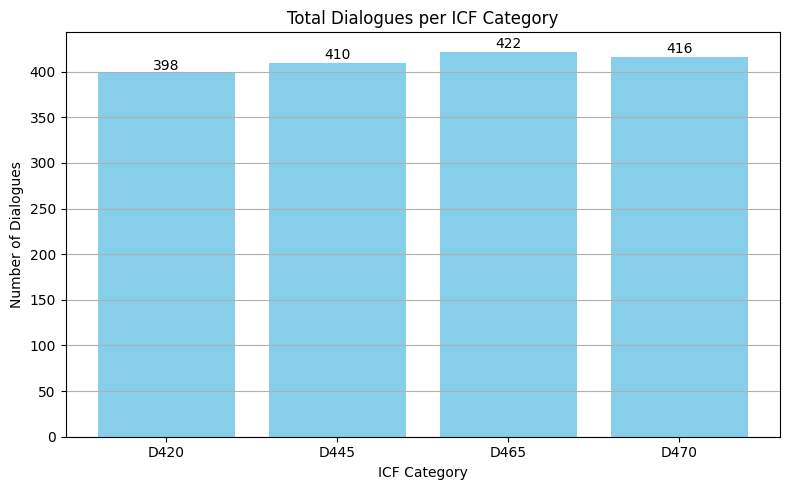

In [59]:
import json
import matplotlib.pyplot as plt
import os

# Define input file paths (modify these if needed)
input_files = {
    "D420_filtered_dialogues.json": "D420",
    "D445_filtered_dialogues.json": "D445",
    "D465_filtered_dialogues.json": "D465",
    "D470_filtered_dialogues.json": "D470"
}

data_folder = "./"  # Folder where your JSON files are located

# Initialize statistics containers
total_dialogues_by_category = {}

# Process each file
for filename, icf_code in input_files.items():
    file_path = os.path.join(data_folder, filename)
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    total_dialogues_by_category[icf_code] = len(data)

# ===== 📊 Visualization: Number of Dialogues per ICF Category =====
plt.figure(figsize=(8, 5))
categories = list(total_dialogues_by_category.keys())
totals = list(total_dialogues_by_category.values())
bars = plt.bar(categories, totals, color='skyblue')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title("Total Dialogues per ICF Category")
plt.xlabel("ICF Category")
plt.ylabel("Number of Dialogues")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [13]:
import json
import matplotlib.pyplot as plt
import os

# Define input file paths
input_files = {
    "D420_filtered_dialogues.json": "D420",
    "D445_filtered_dialogues.json": "D445",
    "D465_filtered_dialogues.json": "D465",
    "D470_filtered_dialogues.json": "D470"
}

data_folder = "./"  # Folder where your JSON files are located
output_folder = "./icf_bar_chart"
os.makedirs(output_folder, exist_ok=True)

# Initialize statistics containers
total_dialogues_by_category = {}

# Process each file
for filename, icf_code in input_files.items():
    file_path = os.path.join(data_folder, filename)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    total_dialogues_by_category[icf_code] = len(data)

# ===== 📊 Visualization: Number of Dialogues per ICF Category =====
plt.figure(figsize=(8, 5))
categories = list(total_dialogues_by_category.keys())
totals = list(total_dialogues_by_category.values())
bars = plt.bar(categories, totals, color='skyblue')

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
             ha='center', va='bottom', fontsize=10)

plt.title("Total Dialogues per ICF Category")
plt.xlabel("ICF Category")
plt.ylabel("Number of Dialogues")
plt.grid(axis='y')
plt.tight_layout()

# Save figure
output_path = os.path.join(output_folder, "dialogue_count_per_icf_category.png")
plt.savefig(output_path)
plt.close()

print(f"Bar chart saved to: {output_path}")


Bar chart saved to: ./icf_bar_chart/dialogue_count_per_icf_category.png


In [10]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os

# Set file paths
input_files = {
    "D420_filtered_dialogues.json": "D420",
    "D445_filtered_dialogues.json": "D445",
    "D465_filtered_dialogues.json": "D465",
    "D470_filtered_dialogues.json": "D470"
}

data_folder = "./"
output_folder = "./severity_pie_charts"
os.makedirs(output_folder, exist_ok=True)

severity_by_category = {}

# Load data
for filename, icf_code in input_files.items():
    file_path = os.path.join(data_folder, filename)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    severity_counter = Counter()
    for item in data:
        severity = item.get("severity_level", "unknown")
        severity_counter[str(severity)] += 1

    severity_by_category[icf_code] = severity_counter

# Define soft pastel colors
soft_colors = ['#AED6F1', '#A3E4D7', '#F9E79F', '#F5CBA7', '#D7BDE2', '#D5DBDB', '#FADBD8']

# Generate and save pie charts
for icf_code, counter in severity_by_category.items():
    sizes = []
    raw_labels = []
    for level, count in sorted(counter.items()):
        sizes.append(count)
        raw_labels.append(level)

    total = sum(sizes)
    labels_with_percent = [f"Severity {lvl} ({count/total:.0%})" for lvl, count in zip(raw_labels, sizes)]

    fig, ax = plt.subplots(figsize=(7, 7))
    wedges, texts = ax.pie(
        sizes,
        colors=soft_colors[:len(sizes)],
        startangle=140,
        labels=labels_with_percent,
        labeldistance=0.7,
        wedgeprops=dict(width=0.5)
    )

    ax.set_title(f"Severity Distribution for {icf_code}")
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()

    # Save figure
    output_path = os.path.join(output_folder, f"{icf_code}_severity_pie.png")
    plt.savefig(output_path)
    plt.close()

print(f"All pie charts saved to: {output_folder}")


All pie charts saved to: ./severity_pie_charts


In [57]:
import os

# List of filtered ChatML txt files to merge
files_to_merge = [
    "D420_chatml_with_icf.txt",
    "D445_chatml_with_icf.txt",
    "D465_chatml_with_icf.txt",
    "D470_chatml_with_icf.txt",
    
]

# Output file for combined fine-tuning
output_file = "merged_D420_D445_D465_D470_chatml.txt"

merged_dialogues = []

for file_path in files_to_merge:
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        continue

    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().strip()
        if content:
            merged_dialogues.append(content)
        else:
            print(f"⚠️ Empty file skipped: {file_path}")

# Join dialogues with double line breaks
with open(output_file, 'w', encoding='utf-8') as f:
    f.write("\n\n".join(merged_dialogues))

print(f"✅ Merged {len(merged_dialogues)} files into: {output_file}")


✅ Merged 4 files into: merged_D420_D445_D465_D470_chatml.txt
